In [25]:
from __future__ import print_function
from __future__ import division

import sys
import torch
import torch.utils.data as data
import os
import time
import pickle
import numpy as np
from PIL import Image
import re
import io

import json
import matplotlib.pyplot as plt
from torchvision import transforms, datasets, models
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import torch.nn.functional as F


from IPython.display import clear_output
import torch.nn as nn
import torch.optim as optim

import itertools
import collections
import pdb
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
cuda

CLASS_LABEL_PATH = "../../../ADARI/furniture/ADARI_furniture_onehots.json"
WORD_TO_INDEX_PATH = "../../../ADARI/furniture/ADARI_furniture_onehots_w2i.json"
INDEX_TO_WORDS_PATH = "../../../ADARI/furniture/ADARI_furniture_onehots_i2w.json"
IMAGE_FOLDER = "../../../ADARI/v2/full"


In [26]:
# Path for file dset_dataloader.json
def open_json(path):
    f = open(path) 
    data = json.load(f) 
    f.close()
    return data 

def flatten(S):
    if S == []:
        return S
    if isinstance(S[0], list):
        return flatten(S[0]) + flatten(S[1:])
    return S[:1] + flatten(S[1:])
def open_json(path):
    f = open(path) 
    data = json.load(f) 
    f.close()
    return data 

class ADARIMultiHotDataset(torch.utils.data.Dataset):
    def __init__(self, image_folder, class_label_file, image_size):
        super(ADARIMultiHotDataset).__init__()
        
        self.image_size = image_size
        self.image_folder = image_folder
        self.class_label_file = class_label_file
        self.transform = transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ])
        self.im_to_one_hots = open_json(self.class_label_file)
        self.im_names = list(self.im_to_one_hots.keys())
        self.num_classes = len(self.im_to_one_hots[self.im_names[0]])
        
    def __len__(self):
        return len(self.im_names)
        
    def __getitem__(self, idx):
        imname = self.im_names[idx]
        
        img = Image.open(self.image_folder + '/' + imname)
        return self.transform(img), torch.tensor(self.im_to_one_hots[imname])
        
index_to_words = open_json(INDEX_TO_WORDS_PATH)  

In [9]:
# Load Data

data = ADARIMultiHotDataset(IMAGE_FOLDER, CLASS_LABEL_PATH, 64)
vocab_size = data.num_classes


In [10]:
summed_onehots = np.zeros(len(data.im_to_one_hots[data.im_names[0]]))

for k, v in data.im_to_one_hots.items():
    summed_onehots += np.array(v)


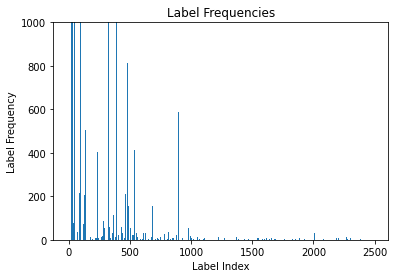

In [19]:
# Plot distribution of labels

plt.bar(np.arange(0, summed_onehots.shape[0]), summed_onehots)
plt.ylim(top = 1000)
plt.xlabel("Label Index")
plt.ylabel("Label Frequency")
plt.title("Label Frequencies")
plt.show()

In [28]:
# Top 10 most common words

sorted_labels = sorted(enumerate(list((summed_onehots))), key=lambda x: -1 * x[1])
top_ten = sorted_labels[:10]


In [30]:
for i, w in top_ten:
    print(index_to_words[str(i)])

different
wooden
small
simple
large
natural
traditional
black
white
solid
